<a href="https://colab.research.google.com/github/aldo-calderon/udg/blob/main/OK_Tarea_TI_Practica2_09022023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Aldo Calderón  
**e-mail:** luis.calderon7957@alumnos.udg.mx

## MODULES

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [3]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen
* Visualizar con **plotly**

* Parametros m = 3.0, Levy_exponent = x, beta = 0

![levy.png](attachment:levy.png)

In [ ]:
std_motion_step = 5
Levy_exponent_20 = 2.0
Levy_exponent_15 = 1.5
Levy_exponent_10 = 1.0
Levy_exponent_05 = 0.5
beta = 0

arr_domain = np.linspace(std_motion_step-5, std_motion_step+5, 400)


Levy_pdf_20 = np.array([levy_stable.pdf(i, alpha = Levy_exponent_20, beta = beta, loc = std_motion_step) for i in arr_domain])

Levy_pdf_15 = np.array([levy_stable.pdf(i, alpha = Levy_exponent_15, beta = beta, loc = std_motion_step) for i in arr_domain])

Levy_pdf_10 = np.array([levy_stable.pdf(i, alpha = Levy_exponent_10, beta = beta, loc = std_motion_step) for i in arr_domain])

Levy_pdf_05 = np.array([levy_stable.pdf(i, alpha = Levy_exponent_05, beta = beta, loc = std_motion_step) for i in arr_domain])



In [ ]:
fig_levy_pdf = go.Figure()

fig_levy_pdf.add_trace(go.Scatter(x = arr_domain,
                                       y = Levy_pdf_20,
                                       marker = dict(size=2),
                                       line = dict(width=2),
                                       mode = 'lines',
                                       name = '2.0',
                                       showlegend = True))


fig_levy_pdf.add_trace(go.Scatter(x = arr_domain,
                                       y = Levy_pdf_15,
                                       marker = dict(size=2),
                                       line = dict(width=2),
                                       mode = 'lines',
                                       name = '1.5',
                                       showlegend = True))

fig_levy_pdf.add_trace(go.Scatter(x = arr_domain,
                                       y = Levy_pdf_10,
                                       marker = dict(size=2),
                                       line = dict(width=2),
                                       mode = 'lines',
                                       name = '1.0',
                                       showlegend = True))


fig_levy_pdf.add_trace(go.Scatter(x = arr_domain,
                                       y = Levy_pdf_05,
                                       marker = dict(size=2),
                                       line = dict(width=2),
                                       mode = 'lines',
                                       name = '0.5',
                                       showlegend = True))

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF
* Visualizar con **matplotlib**

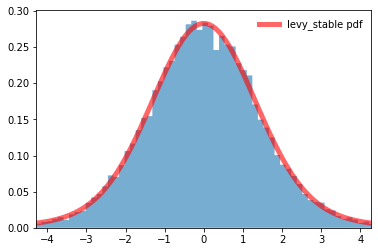

In [ ]:
fig, ax = plt.subplots(1, 1)
alpha, beta = 1.8, 0

x = np.linspace(levy_stable.ppf(0.01, alpha, beta),
                levy_stable.ppf(0.99, alpha, beta), 100)
ax.plot(x, levy_stable.pdf(x, alpha, beta),
       'r-', lw=5, alpha=0.6, label='levy_stable pdf')

r = levy_stable.rvs(alpha, beta, size=20000)

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.6)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)



plt.show()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**

In [ ]:
n_step = 100
s_pos = [0, 0]
speed = 6
crw_exponent=0.4
lv_exp=.5
std_motion_step = 3

alpha, beta = 1, 0

#inicializar nuestro vector Init velocity vector
velocity = Vec2d(speed,0)

# Inicializar DF
BM_2D_df = pd.DataFrame(columns=['x_pos', 'y_pos'])

#DF temporal para concatenar
temp_df = pd.DataFrame([{'x_pos': s_pos[0], 'y_pos': s_pos[1]}])

BM_2D_df = pd.concat([BM_2D_df, temp_df], ignore_index=True)

for i in range(n_step-1):
  turn_angle = wrapcauchy.rvs(crw_exponent)
  velocity = velocity.rotated(turn_angle)

  steps = levy_stable.rvs(alpha = lv_exp, beta = beta, loc = std_motion_step)
  
  cnt = 0
  while(cnt<steps):
    temp_df = pd.DataFrame([{'x_pos': BM_2D_df.x_pos[i]+velocity.x, 'y_pos': BM_2D_df.y_pos[i]+velocity.y}])
    BM_2D_df = pd.concat([BM_2D_df, temp_df], ignore_index=True)
    cnt=cnt+1


times = np.linspace(0, 1, n_step)

fig_bm_2d = go.Figure()

# Plot trajectory
fig_bm_2d.add_trace(go.Scatter3d(x = BM_2D_df.x_pos,
                             y = BM_2D_df.y_pos,
                             z = times,
                             marker = dict(size=2),
                             line = dict(width=2),
                             mode = 'lines',
                             name = 'Levy',
                             showlegend = True))

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable n_traj
* Cada una de las debe tener un coeficiente de Cauchy diferente
* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**
* Exportar trayectorias como *pkl*

In [9]:
n_traj = 3
n_step = 1000
s_pos = [0, 0]
speed = 6
crw_exponent=0.4
lv_exp=.5
std_motion_step = 3

alpha, beta = 1.8, -0.5

#inicializar nuestro vector Init velocity vector
velocity = Vec2d(speed,0)

# Inicializar DF
BM_2D_df = pd.DataFrame(columns=['x_pos', 'y_pos'])

#DF temporal para concatenar
temp_df = pd.DataFrame([{'x_pos': s_pos[0], 'y_pos': s_pos[1]}])

BM_2D_df = pd.concat([BM_2D_df, temp_df], ignore_index=True)

for traj in range(n_traj):
  for i in range(n_step-1):
    turn_angle = np.random.uniform(0, 2*np.pi)
    velocity = velocity.rotated(turn_angle)

    steps = levy_stable.rvs(alpha = lv_exp, beta = beta, loc = std_motion_step)
    
    temp_df = pd.DataFrame([{'x_pos': BM_2D_df.x_pos[i]+velocity.x, 'y_pos': BM_2D_df.y_pos[i]+velocity.y}])
    BM_2D_df = pd.concat([BM_2D_df, temp_df], ignore_index=True)



times = np.linspace(0, 1, n_step)

fig_bm_2d = go.Figure()

    # Plot trajectory
fig_bm_2d.add_trace(go.Scatter3d(x = BM_2D_df.x_pos,
                                y = BM_2D_df.y_pos,
                                z = times,
                                marker = dict(size=2),
                                line = dict(width=2),
                                mode = 'lines',
                                name = 'Levy',
                                showlegend = True))